In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/meghanapenmetsa/Downloads/archive (2)/pulsar_data_train.csv")

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [4]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [8]:
list(df.columns)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

In [9]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [15]:
mean_excess = df[' Excess kurtosis of the integrated profile'].mean()
mean_sd = df[' Standard deviation of the DM-SNR curve'].mean()
mean_sk = df[' Skewness of the DM-SNR curve'].mean()

In [16]:
df[' Excess kurtosis of the integrated profile'].fillna(mean_excess, inplace=True)
df[' Standard deviation of the DM-SNR curve'].fillna(mean_sd, inplace=True)
df[' Skewness of the DM-SNR curve'].fillna(mean_sk, inplace=True)

In [19]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [20]:
X = df.drop(['target_class'], axis=1)
Y = df['target_class']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [29]:
cols = x_train.columns

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

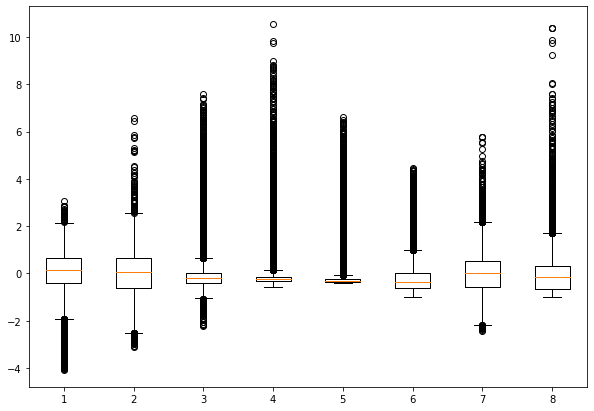

In [32]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(X_train)
plt.show()

In [33]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [34]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-6.504365e-17,-3.447540e-16,7.555100e-18,2.044142e-17,-1.972413e-17,1.099091e-16,5.373869e-17,-6.664440e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.068339e+00,-3.134139e+00,-2.223380e+00,-5.727451e-01,-4.214866e-01,-1.021415e+00,-2.455262e+00,-1.021468e+00
25%,-3.959611e-01,-6.097959e-01,-4.255271e-01,-3.173982e-01,-3.643063e-01,-6.246641e-01,-5.566043e-01,-6.425814e-01
50%,1.596222e-01,6.301244e-02,-1.901037e-01,-2.550993e-01,-3.344944e-01,-3.613014e-01,2.694159e-02,-1.714147e-01
75%,6.302598e-01,6.596210e-01,-1.547561e-03,-1.375948e-01,-2.455011e-01,2.249242e-02,5.321119e-01,2.928110e-01
max,3.042041e+00,6.582758e+00,7.607455e+00,1.056901e+01,6.601589e+00,4.469061e+00,5.789238e+00,1.036577e+01


In [35]:
X_train.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
dtype: int64

In [37]:
X_train.drop([' Excess kurtosis of the integrated profile', ' Standard deviation of the DM-SNR curve', ' Skewness of the DM-SNR curve'], axis=1)

/Users/meghanapenmetsa/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
0,-0.014800,0.008072,-0.267138,-0.327459,-0.060276
1,0.656612,-0.935945,-0.182541,-0.269155,-0.547480
2,0.519490,0.077371,-0.261074,-0.384134,1.028518
3,-0.135008,-0.117301,-0.159627,-0.362088,0.469943
4,0.837226,-0.515738,-0.214350,-0.351977,0.208092
...,...,...,...,...,...
10017,-0.202058,-2.020695,0.199563,-0.348382,0.169907
10018,-0.062521,-0.295525,-0.176671,-0.403625,2.088420
10019,-3.871717,-1.668218,4.747997,2.066758,-1.606886
10020,-0.203568,0.227745,-0.222527,-0.309120,-0.231820


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [44]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [47]:
y_pred=svc.predict(X_test)
print('Accuracy on Default Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on Default Model: 0.9796488427773344



array([[2272,    7],
       [  44,  183]])

In [48]:
svc=SVC(C=100.0) 
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('Accuracy on RBF, c=100 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on RBF, c=100 Model: 0.9776536312849162



array([[2265,   14],
       [  42,  185]])

In [49]:
svc=SVC(C=1000.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on RBF, c=1000 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on RBF, c=1000 Model: 0.9764565043894653



array([[2260,   19],
       [  40,  187]])

In [50]:
svc=SVC(kernel='linear', C=1.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on linear, c=1 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on linear, c=1 Model: 0.9776536312849162



array([[2272,    7],
       [  49,  178]])

In [51]:
svc=SVC(kernel='linear', C=100.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on linear, c=100 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on linear, c=100 Model: 0.9780526735833999



array([[2272,    7],
       [  48,  179]])

In [52]:
svc=SVC(kernel='linear', C=1000.0) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on linear, c=1000 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on linear, c=1000 Model: 0.9780526735833999



array([[2273,    6],
       [  49,  178]])

In [53]:
svc=SVC(C=100.0,gamma=100) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on RBF, c=100 , Gamma=100 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on RBF, c=100 , Gamma=100 Model: 0.9094173982442139



array([[2279,    0],
       [ 227,    0]])

In [54]:
svc=SVC(kernel='linear', C=100.0,gamma=100) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred_train=svc.predict(X_train)
print('Accuracy on linear, c=100, gamma=100 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on linear, c=100, gamma=100 Model: 0.9780526735833999



array([[2272,    7],
       [  48,  179]])

In [55]:
svc=SVC(C=1000.0,gamma=1000) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on c=1000 ,gamma=1000 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)

Accuracy on c=1000 ,gamma=1000 Model: 0.9094173982442139



array([[2279,    0],
       [ 227,    0]])

In [ ]:
svc=SVC(kernel='linear', C=1000.0,gamma=1000) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on linear, c=1000 ,gamma=1000 Model:',accuracy_score(y_test,y_pred))
print()
confusion_matrix(y_test, y_pred)